In [68]:
import pandas as pd
import numpy as np

In [74]:
data = pd.read_csv("Data/X_train.csv")
data.head()

,Doctor Identifier,Provider Type,Number of Services,Number of Beneficiaries,Total Submitted Charge Amount,Total Allowed Amount,Total Payment Amount,Total Standardized Payment Amount,Number of Drug Services,Total Drug Submitted Charge Amount,...,Percent Depression,Percent Diabetes,Percent Hyperlipidemia,Percent Hypertension,Percent Ischemic Heart Disease,Percent Osteoporosis,Percent Rheumatoid Arthritis or Osteoarthritis,Percent Schizophrenia or Other Psychotic Disorders,Percent Stroke,Average HCC Risk Score of Beneficiaries
0,450181093,Optometry,491,66,52550.00,45827.70,34211.71,32460.86,0,0.00,...,75.0,18.00,41.0,50.0,3.11,0.83,23.0,18.00,0.65,1.28
1,375128823,Emergency Medicine,3883,211,165408.00,84216.16,62257.97,62267.51,3304,28918.00,...,42.0,24.00,48.0,56.0,22.00,9.00,38.0,7.00,10.00,1.52
2,429379427,CRNA,3103,632,531584.25,230479.28,174262.00,167305.78,1016,32044.25,...,24.0,19.00,44.0,57.0,25.00,12.00,67.0,4.00,7.00,1.11
3,993555030,Podiatry,43,42,2935.00,2932.84,1652.31,4208.75,0,0.00,...,31.0,0.89,62.0,57.0,36.00,0.27,38.0,0.44,0.25,1.00
4,786413532,Licensed Clinical Social Worker,151,34,13118.00,3991.45,3911.61,3402.45,0,0.00,...,56.0,75.00,75.0,75.0,41.00,0.05,56.0,0.00,0.03,1.57


In [75]:
data = pd.get_dummies(data, columns=["Provider Type"])

In [76]:
data.head()

,Doctor Identifier,Number of Services,Number of Beneficiaries,Total Submitted Charge Amount,Total Allowed Amount,Total Payment Amount,Total Standardized Payment Amount,Number of Drug Services,Total Drug Submitted Charge Amount,Total Drug Allowed Amount,...,Provider Type_Registered Dietician/Nutrition Professional,Provider Type_Rheumatology,Provider Type_Sleep Medicine,Provider Type_Speech Language Pathologist,Provider Type_Sports Medicine,Provider Type_Surgical Oncology,Provider Type_Thoracic Surgery,Provider Type_Unknown Physician Specialty Code,Provider Type_Urology,Provider Type_Vascular Surgery
0,450181093,491,66,52550.00,45827.70,34211.71,32460.86,0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
1,375128823,3883,211,165408.00,84216.16,62257.97,62267.51,3304,28918.00,18847.34,...,0,0,0,0,0,0,0,0,0,0
2,429379427,3103,632,531584.25,230479.28,174262.00,167305.78,1016,32044.25,22049.04,...,0,0,0,0,0,0,0,0,0,0
3,993555030,43,42,2935.00,2932.84,1652.31,4208.75,0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
4,786413532,151,34,13118.00,3991.45,3911.61,3402.45,0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0


In [77]:
filter_col = [col for col in data if col.startswith('Provider Type_')]
providers = data[filter_col]
#providers

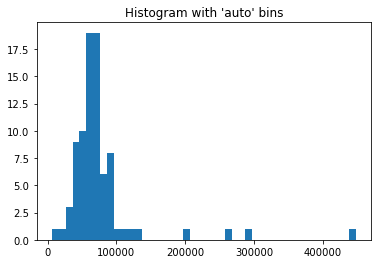

In [78]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    count = 0
    for y in ys:
        if y < lower_bound or y > upper_bound:
            count+=1
    return count

averages = []
stds = []
for col in filter_col:
    doctors = data[data[col] == 1]
    pay_amt = doctors['Total Standardized Payment Amount'].values
    #outliers.append(1.0*outliers_iqr(pay_amt)/len(pay_amt))
    averages.append(np.average(pay_amt))
    stds.append(np.std(pay_amt))

    
import matplotlib.pyplot as plt
plt.hist(averages, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [82]:
col_names = []
for name in filter_col:
    col_names.append(name[name.index("_")+1:])

In [ ]:
data = pd.read_csv("Data")


In [47]:
print(len(indicies))        

84


In [44]:
provider_type = []
first_col = data.columns.get_loc(filter_col[0])
for i in range(0, len(data)):
    for j in range(first_col, len(data.iloc[0,:])):
        if data.iloc[i,j] == 1:
            if j-first_col in indicies:
                provider_type.append(1)
            else:
                provider_type.append(0)
            break

data["Provider Type"] = provider_type
    

In [46]:
sum(data["Provider Type"].values)

10

In [48]:
data = pd.read_csv("Data/X_train_scaled.csv")
data.head()

,Doctor Identifier,Provider Type,Number of Beneficiaries,Services by Beneficiary,Total Submitted Charge Amount,Total Allowed Amount,Total Payment Amount,Total Standardized Payment Amount,Number of Drug Services,Total Drug Submitted Charge Amount,...,Percent Depression,Percent Diabetes,Percent Hyperlipidemia,Percent Hypertension,Percent Ischemic Heart Disease,Percent Osteoporosis,Percent Rheumatoid Arthritis or Osteoarthritis,Percent Schizophrenia or Other Psychotic Disorders,Percent Stroke,Average HCC Risk Score of Beneficiaries
0,450181093,Optometry,66,7.439394,107.026477,93.335438,69.677617,66.111731,0.000000,0.000000,...,75.0,18.00,41.0,50.0,3.11,0.83,23.0,18.00,0.65,1.28
1,375128823,Emergency Medicine,211,18.402844,42.597991,21.688426,16.033472,16.035928,0.850888,7.447335,...,42.0,24.00,48.0,56.0,22.00,9.00,38.0,7.00,10.00,1.52
2,429379427,CRNA,632,4.909810,171.313003,74.276275,56.159201,53.917428,0.327425,10.326861,...,24.0,19.00,44.0,57.0,25.00,12.00,67.0,4.00,7.00,1.11
3,993555030,Podiatry,42,1.023810,68.255814,68.205581,38.425814,97.877907,0.000000,0.000000,...,31.0,0.89,62.0,57.0,36.00,0.27,38.0,0.44,0.25,1.00
4,786413532,Licensed Clinical Social Worker,34,4.441176,86.874172,26.433444,25.904702,22.532781,0.000000,0.000000,...,56.0,75.00,75.0,75.0,41.00,0.05,56.0,0.00,0.03,1.57


In [61]:
provider_scores = pd.read_csv("Data/gmm_risk_provider_type.csv")
provider_scores.head()

,Row Labels,Average of GMM classifier risk
0,Addiction Medicine,2.673125
1,All Other Suppliers,2.673125
2,Anesthesiologist Assistants,2.673125
3,Geriatric Psychiatry,2.673125
4,Interventional Pain Management,2.673125


In [67]:
providers = data['Provider Type'].values
provider_types = provider_scores['Row Labels'].values
provider_score_vals = provider_scores['Average of GMM classifier risk'].values
new_providers = []
for provider in providers:
    for i in range(0, len(provider_types)):
        if provider_types[i] == provider:
            new_providers.append(provider_score_vals[i])
            break
            

    


In [66]:
data['Provider Type'] = new_providers
data.head()
data.to_csv("Data/X_train_scaled_doctors.csv")

In [ ]:
provider_risk = []
gmm_risks = provider_scores['Average of GMM classifier risk'].values
print(np.unique(gmm_risks))
curr_val = gmm_risks[0]
count = 1
for i in range(0, len(gmm_risks)):
    if gmm_risks[i] == curr_val:
        gmm_risks[i] = count
    else:
        count += 1
        gmm_risks[i] = count

gmm_risks